# Tensors
Where the magic begins!

In [1]:
import torch

In [19]:
x = torch.randint(255, (3, 3), dtype=torch.float)
y = torch.rand(3, 3)
print(x, '\n', y)

tensor([[101., 154., 207.],
        [ 56., 101., 106.],
        [ 89., 122., 236.]]) 
 tensor([[0.8468, 0.2695, 0.5799],
        [0.9236, 0.1147, 0.5958],
        [0.1730, 0.5902, 0.7886]])


In [20]:
x.add_(y)

tensor([[101.8468, 154.2695, 207.5799],
        [ 56.9236, 101.1147, 106.5958],
        [ 89.1730, 122.5901, 236.7886]])

In [23]:
x

tensor([[101.8468, 154.2695, 207.5799],
        [ 56.9236, 101.1147, 106.5958],
        [ 89.1730, 122.5901, 236.7886]])

# Make our square nines

In [4]:
X = torch.randint(255, (400, 3, 3), dtype=torch.float)
X

tensor([[[ 78., 152., 169.],
         [ 38., 232.,  37.],
         [ 15., 104., 120.]],

        [[ 11.,  56., 151.],
         [144., 215., 190.],
         [108., 245.,   3.]],

        [[ 79., 199., 246.],
         [246.,  37.,  96.],
         [233.,  84., 250.]],

        ...,

        [[186., 155.,  49.],
         [182., 146.,  99.],
         [ 66., 202., 113.]],

        [[235.,  74.,  17.],
         [ 25.,  64.,   9.],
         [ 57., 199., 139.]],

        [[113., 187.,  31.],
         [ 66., 186.,  51.],
         [197., 142., 173.]]])

In [24]:
X = X.view(-1, 9)
X

tensor([[ 78., 152., 169.,  ...,  15., 104., 120.],
        [ 11.,  56., 151.,  ..., 108., 245.,   3.],
        [ 79., 199., 246.,  ..., 233.,  84., 250.],
        ...,
        [186., 155.,  49.,  ...,  66., 202., 113.],
        [235.,  74.,  17.,  ...,  57., 199., 139.],
        [113., 187.,  31.,  ..., 197., 142., 173.]])

In [6]:
w = [[1, 1, 1, 0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 1, 1, 1, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0, 1, 1, 1]]

magic_w = torch.tensor(w, dtype=torch.float)
X.mm(magic_w.t())

tensor([[399., 307., 239.],
        [218., 549., 356.],
        [524., 379., 567.],
        ...,
        [390., 427., 381.],
        [326.,  98., 395.],
        [331., 303., 512.]])

In [9]:
y = torch.argmax(X.mm(magic_w.t()), 1)
y

tensor([0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2,
        2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0,
        2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2,
        0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2,
        2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2,
        1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0,
        1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1,
        0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2,
        0, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0,
        1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0,
        2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2,
        1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1,
        0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2,

In [10]:
y = torch.zeros(400, 3, dtype=torch.float).scatter_(1, y.view(-1, 1), 1)
y

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])

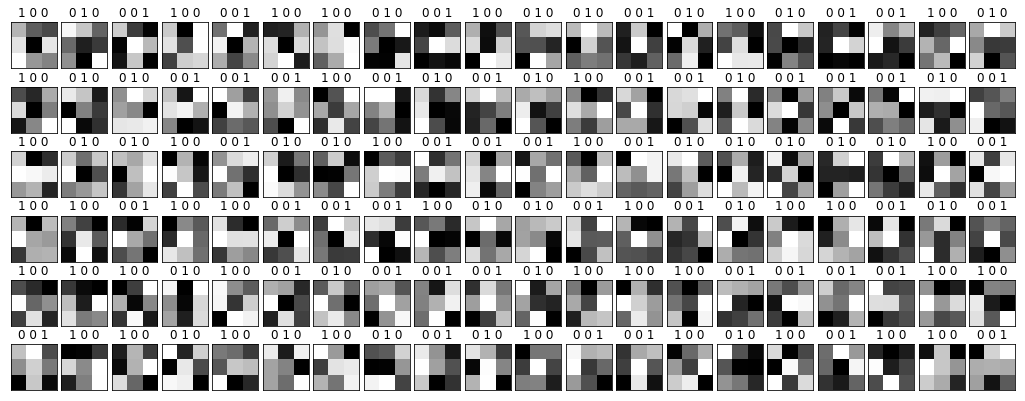

In [12]:
from utils.draw import draw_xy

draw_xy(X, y)